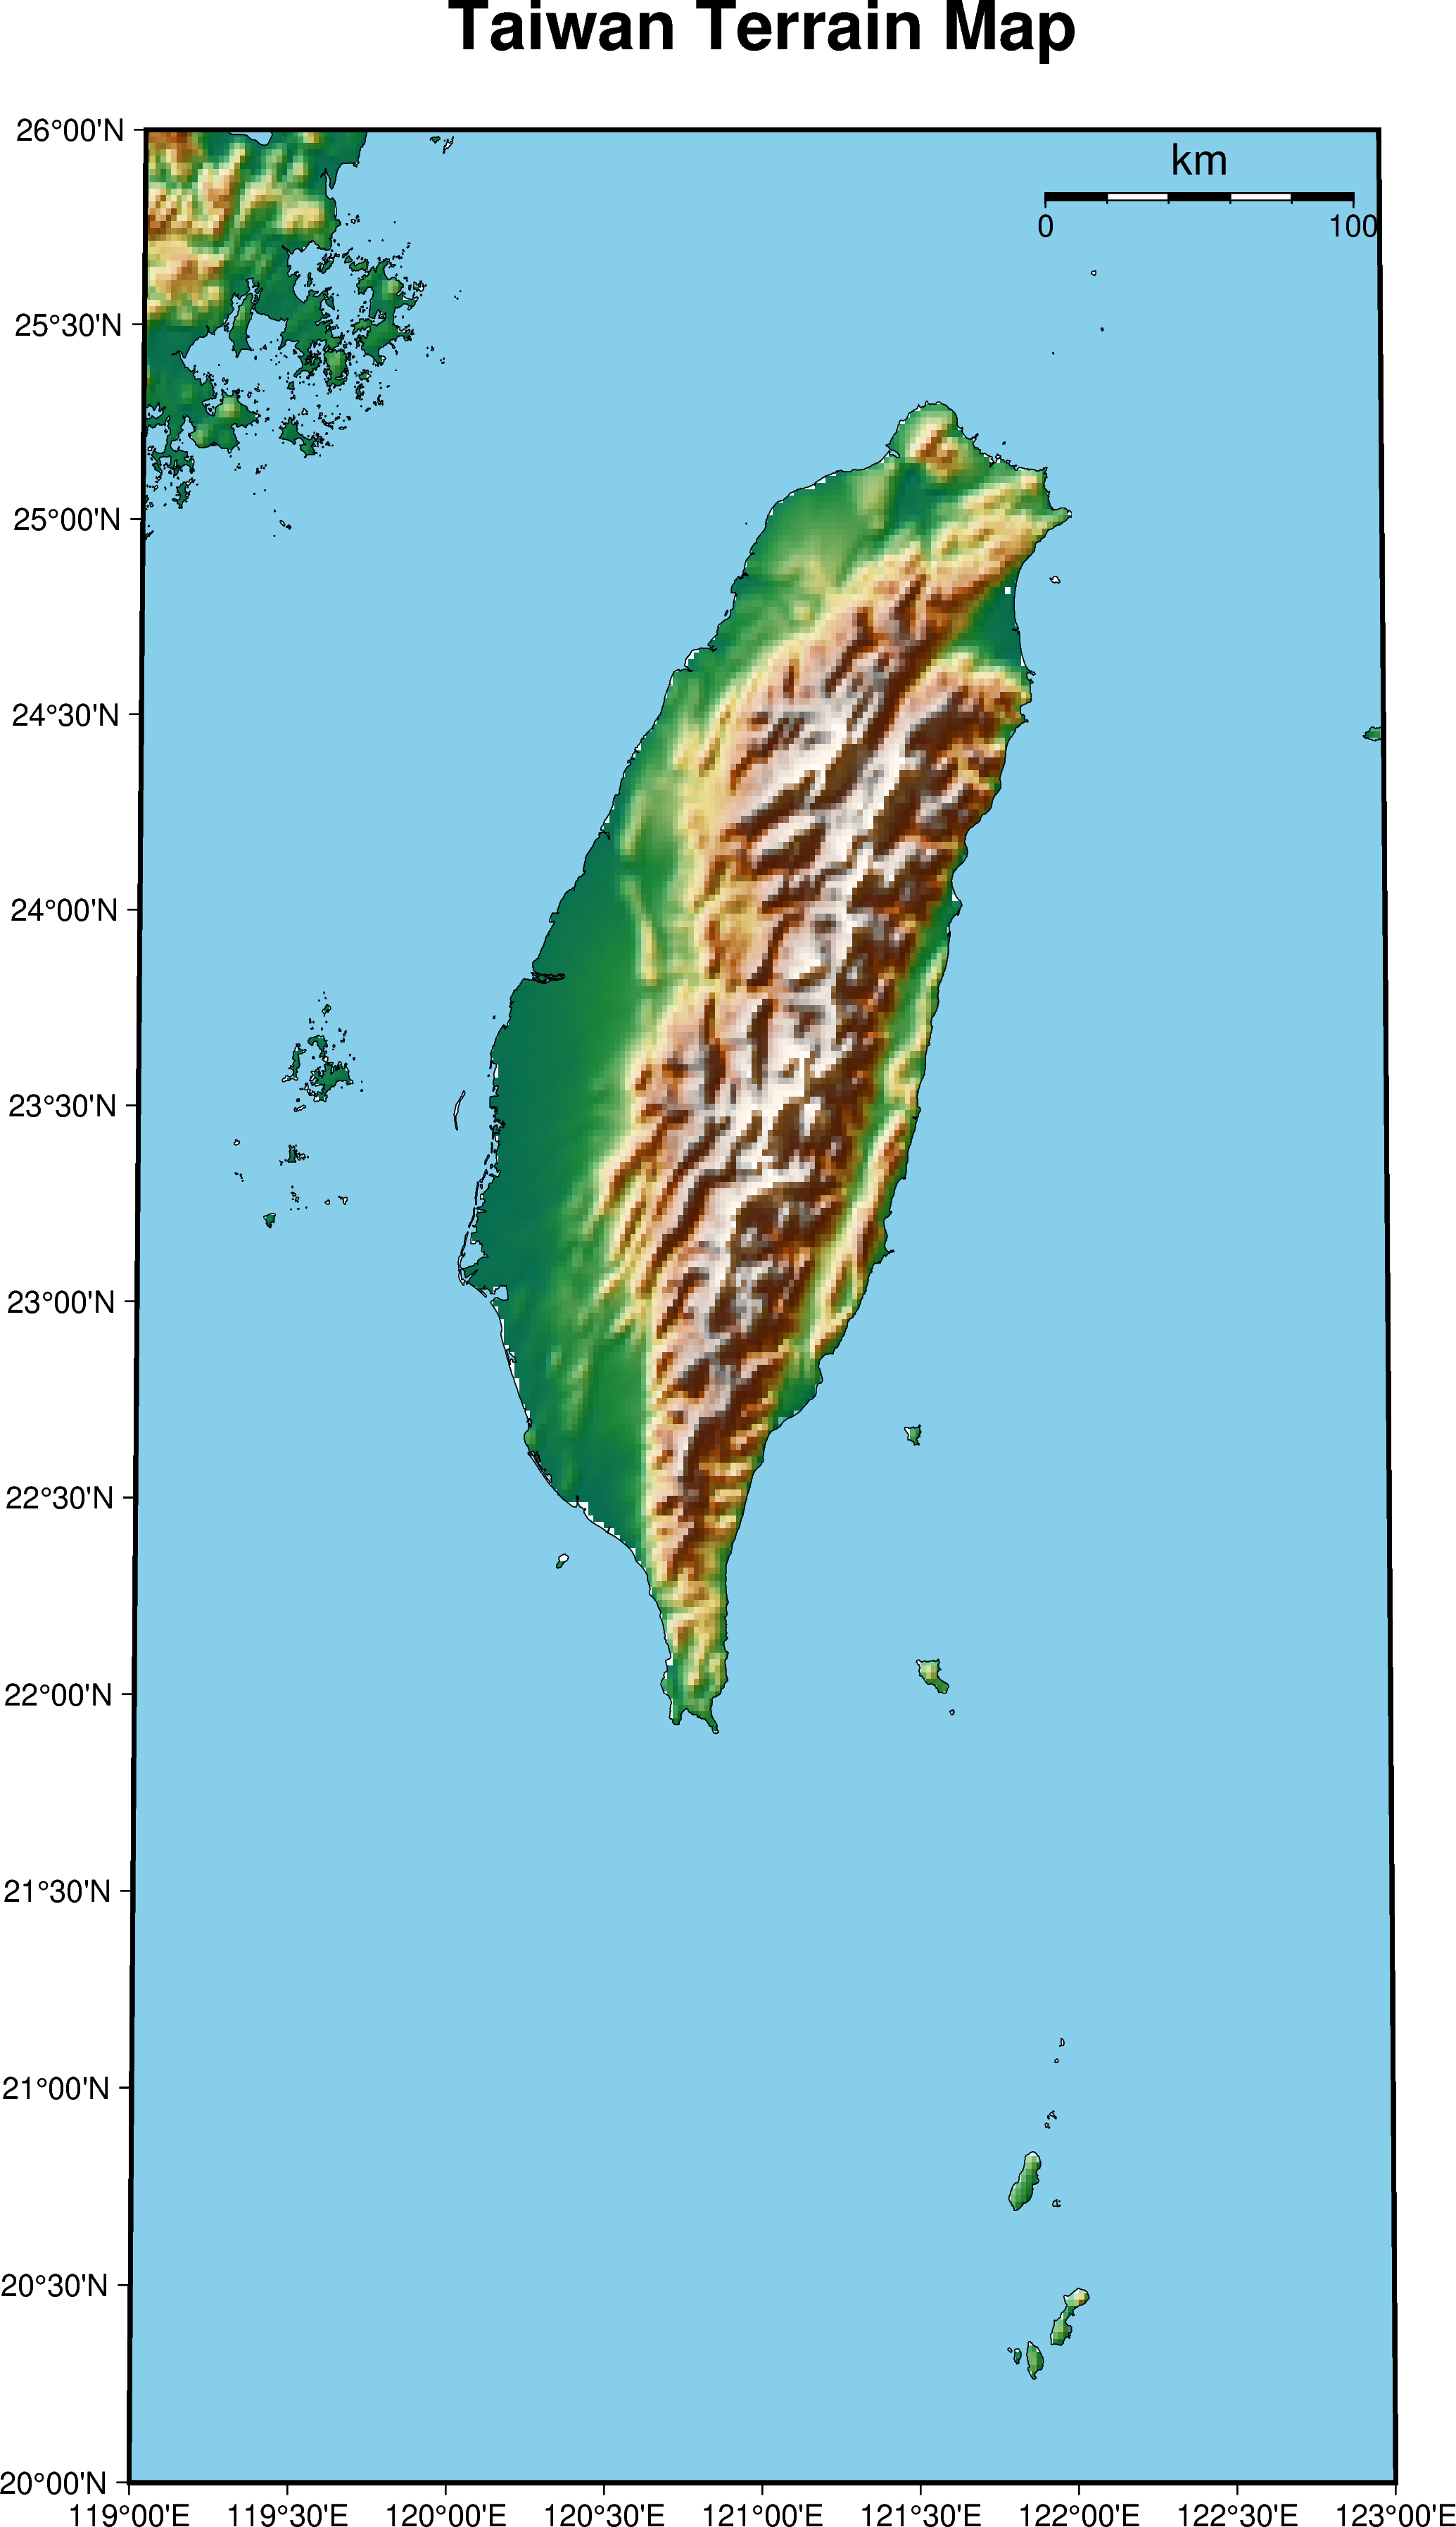

In [1]:
import pygmt

# 初始化圖形
fig = pygmt.Figure()

# 添加地形陰影效果
fig.grdimage(
    grid="@earth_relief_01m",
    shading=True,
    region=[119, 123, 20, 26],
    projection="W6i",
    frame=["a0.5"]  # 這裡只設置框架，不包含標題
)

# 繪製海岸線並設置填色
fig.coast(shorelines=True, borders="1/0.5p,black", water="skyblue")

# 添加圖名，將標題向下移動
fig.basemap(frame=["WSne+tTaiwan Terrain Map+o0.3i/0.3i"])  # 調整Y軸偏移量以移動標題

# 添加比例尺在右上角，並設置邊距
fig.basemap(map_scale="jTR+w100k+l+f1km+o0.2i/0.3i")  # 在右上角添加比例尺

# 顯示地圖
fig.show()


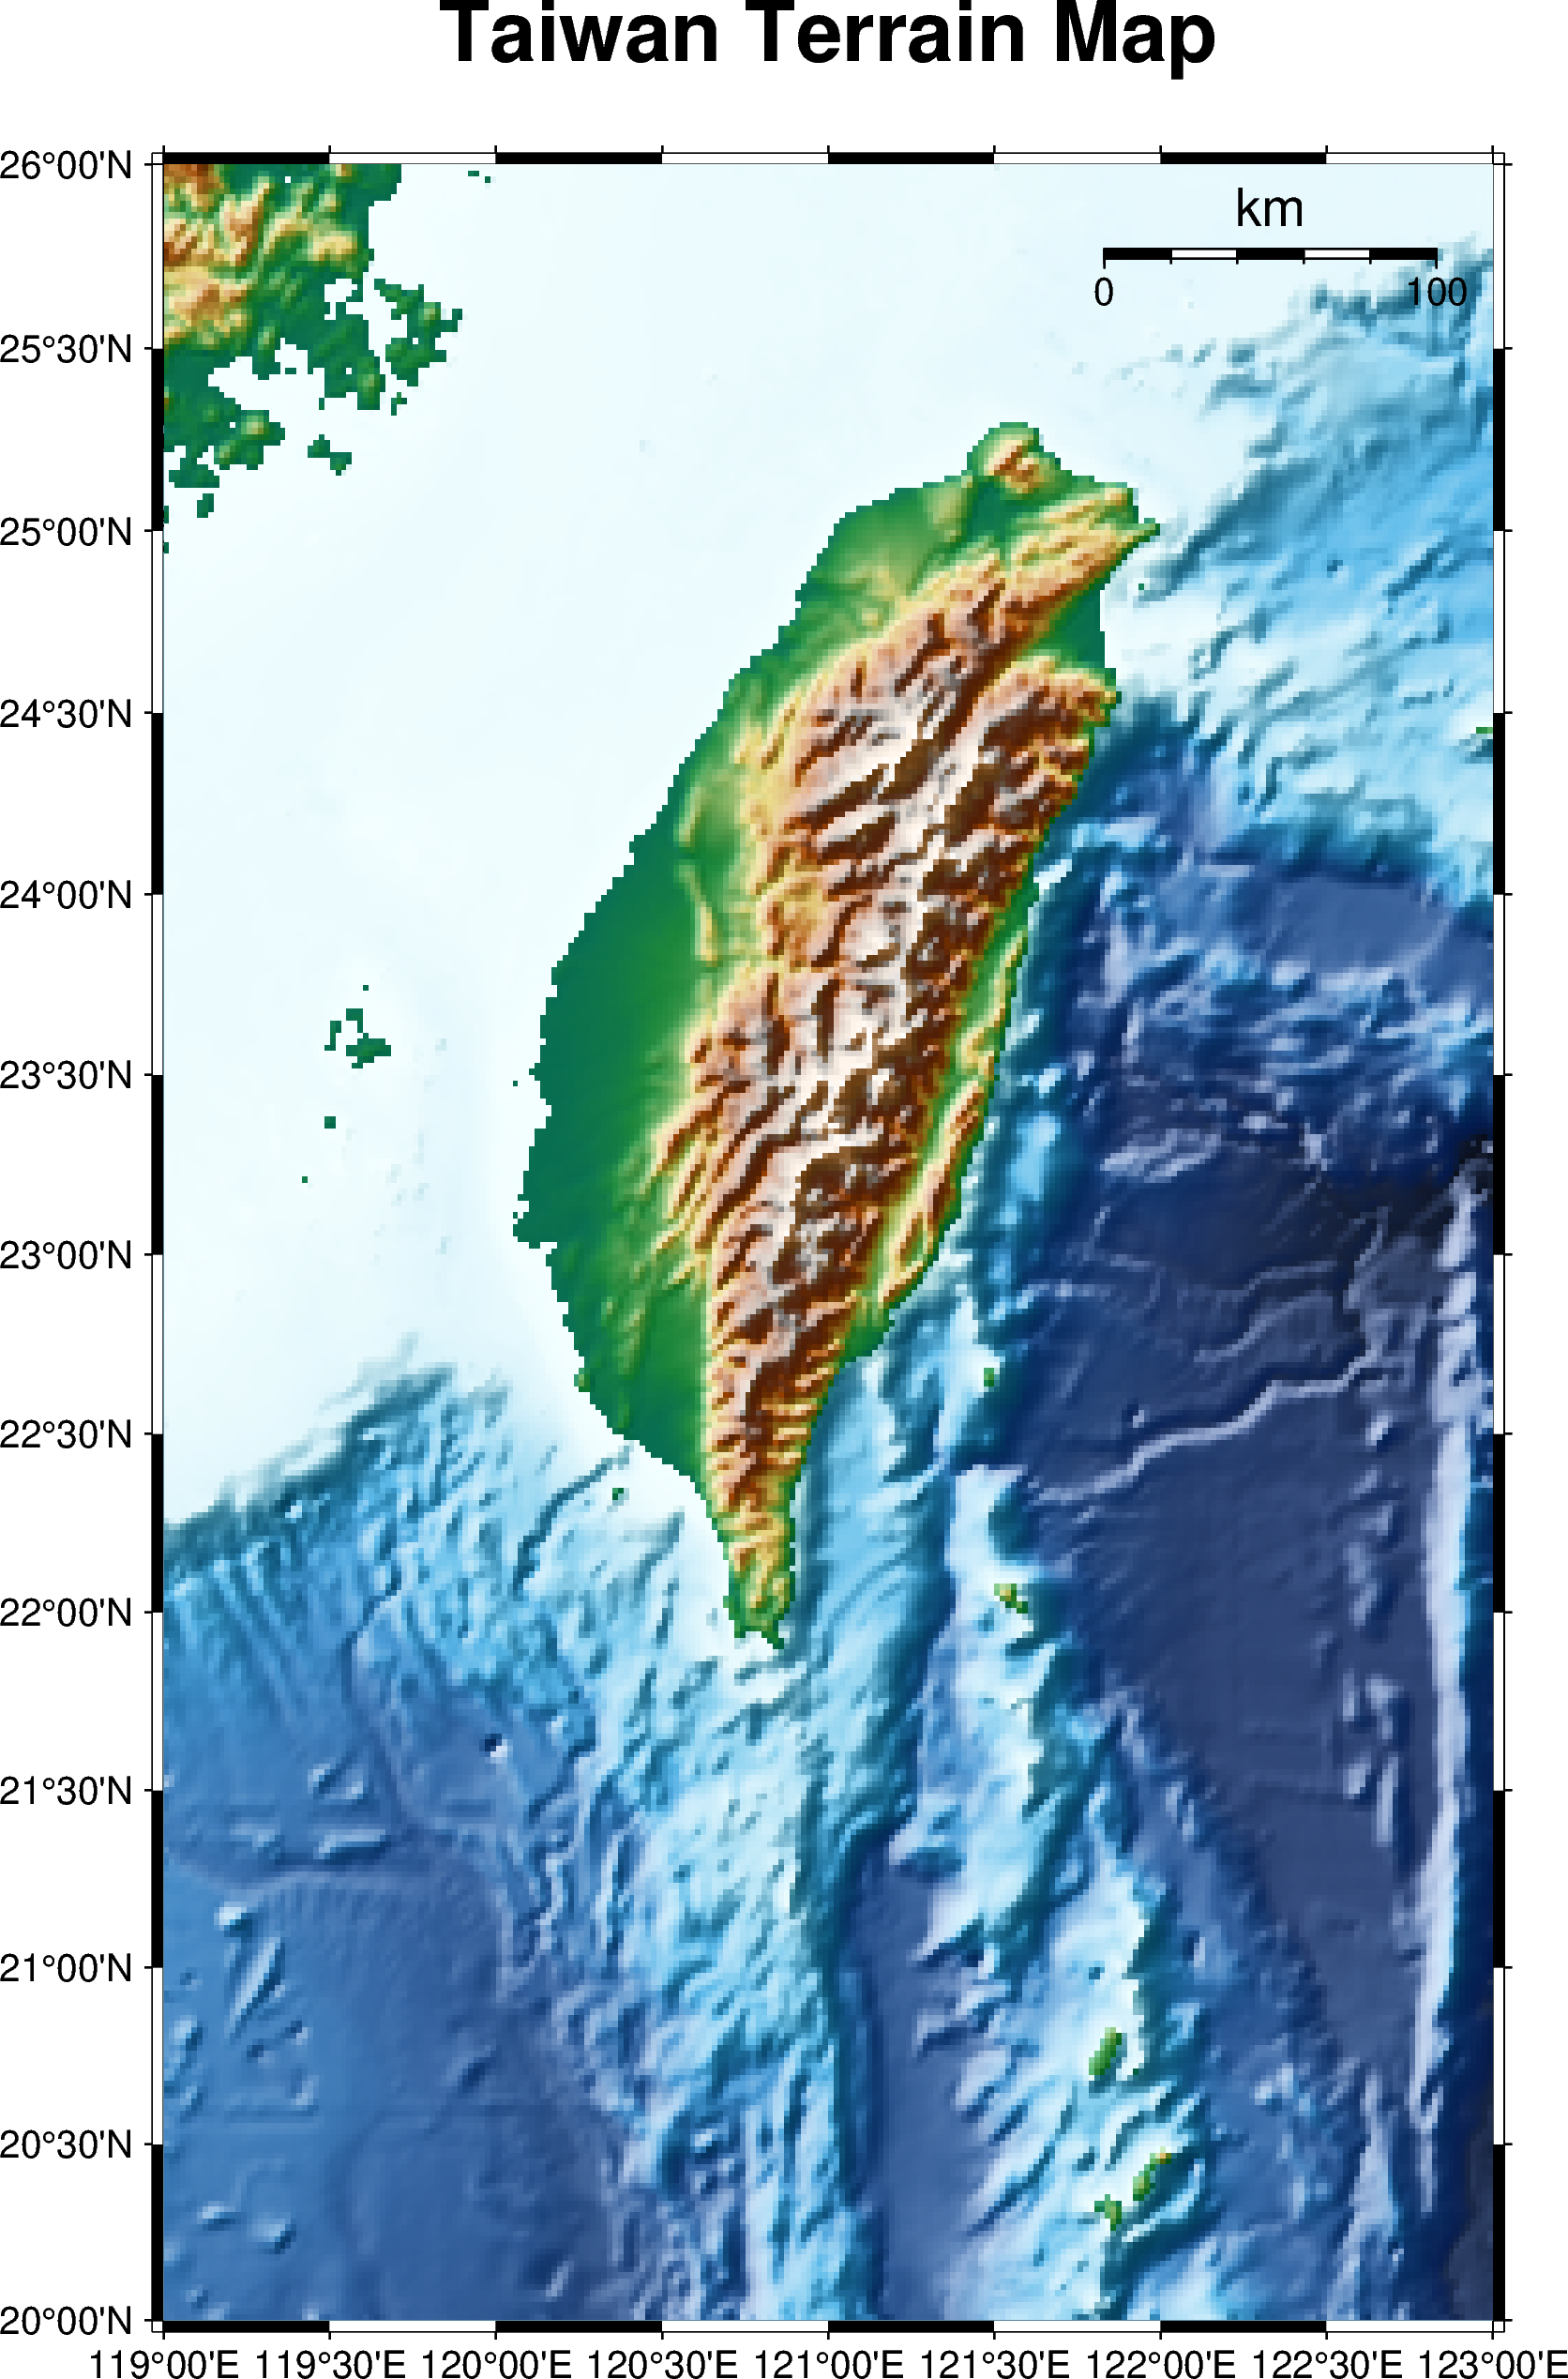

In [8]:
import pygmt

# Initialize the figure
fig = pygmt.Figure()

# Set the region and projection
fig.basemap(region=[119, 123, 20, 26], projection="M12c", frame=["a0.5"])

# Add land and water
fig.coast(shorelines=True, borders="1/0.5p,black", water="skyblue")

# Add terrain shading
fig.grdimage(grid="@earth_relief_01m", shading=True)

# Add map title
fig.basemap(frame=["WSne+tTaiwan Terrain Map+o0.3i/0.3i"])

# Add scale bar
fig.basemap(map_scale="jTR+w100k+l+f1km+o0.2i/0.3i")

# Show the map
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8212\2218966620.py:61: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


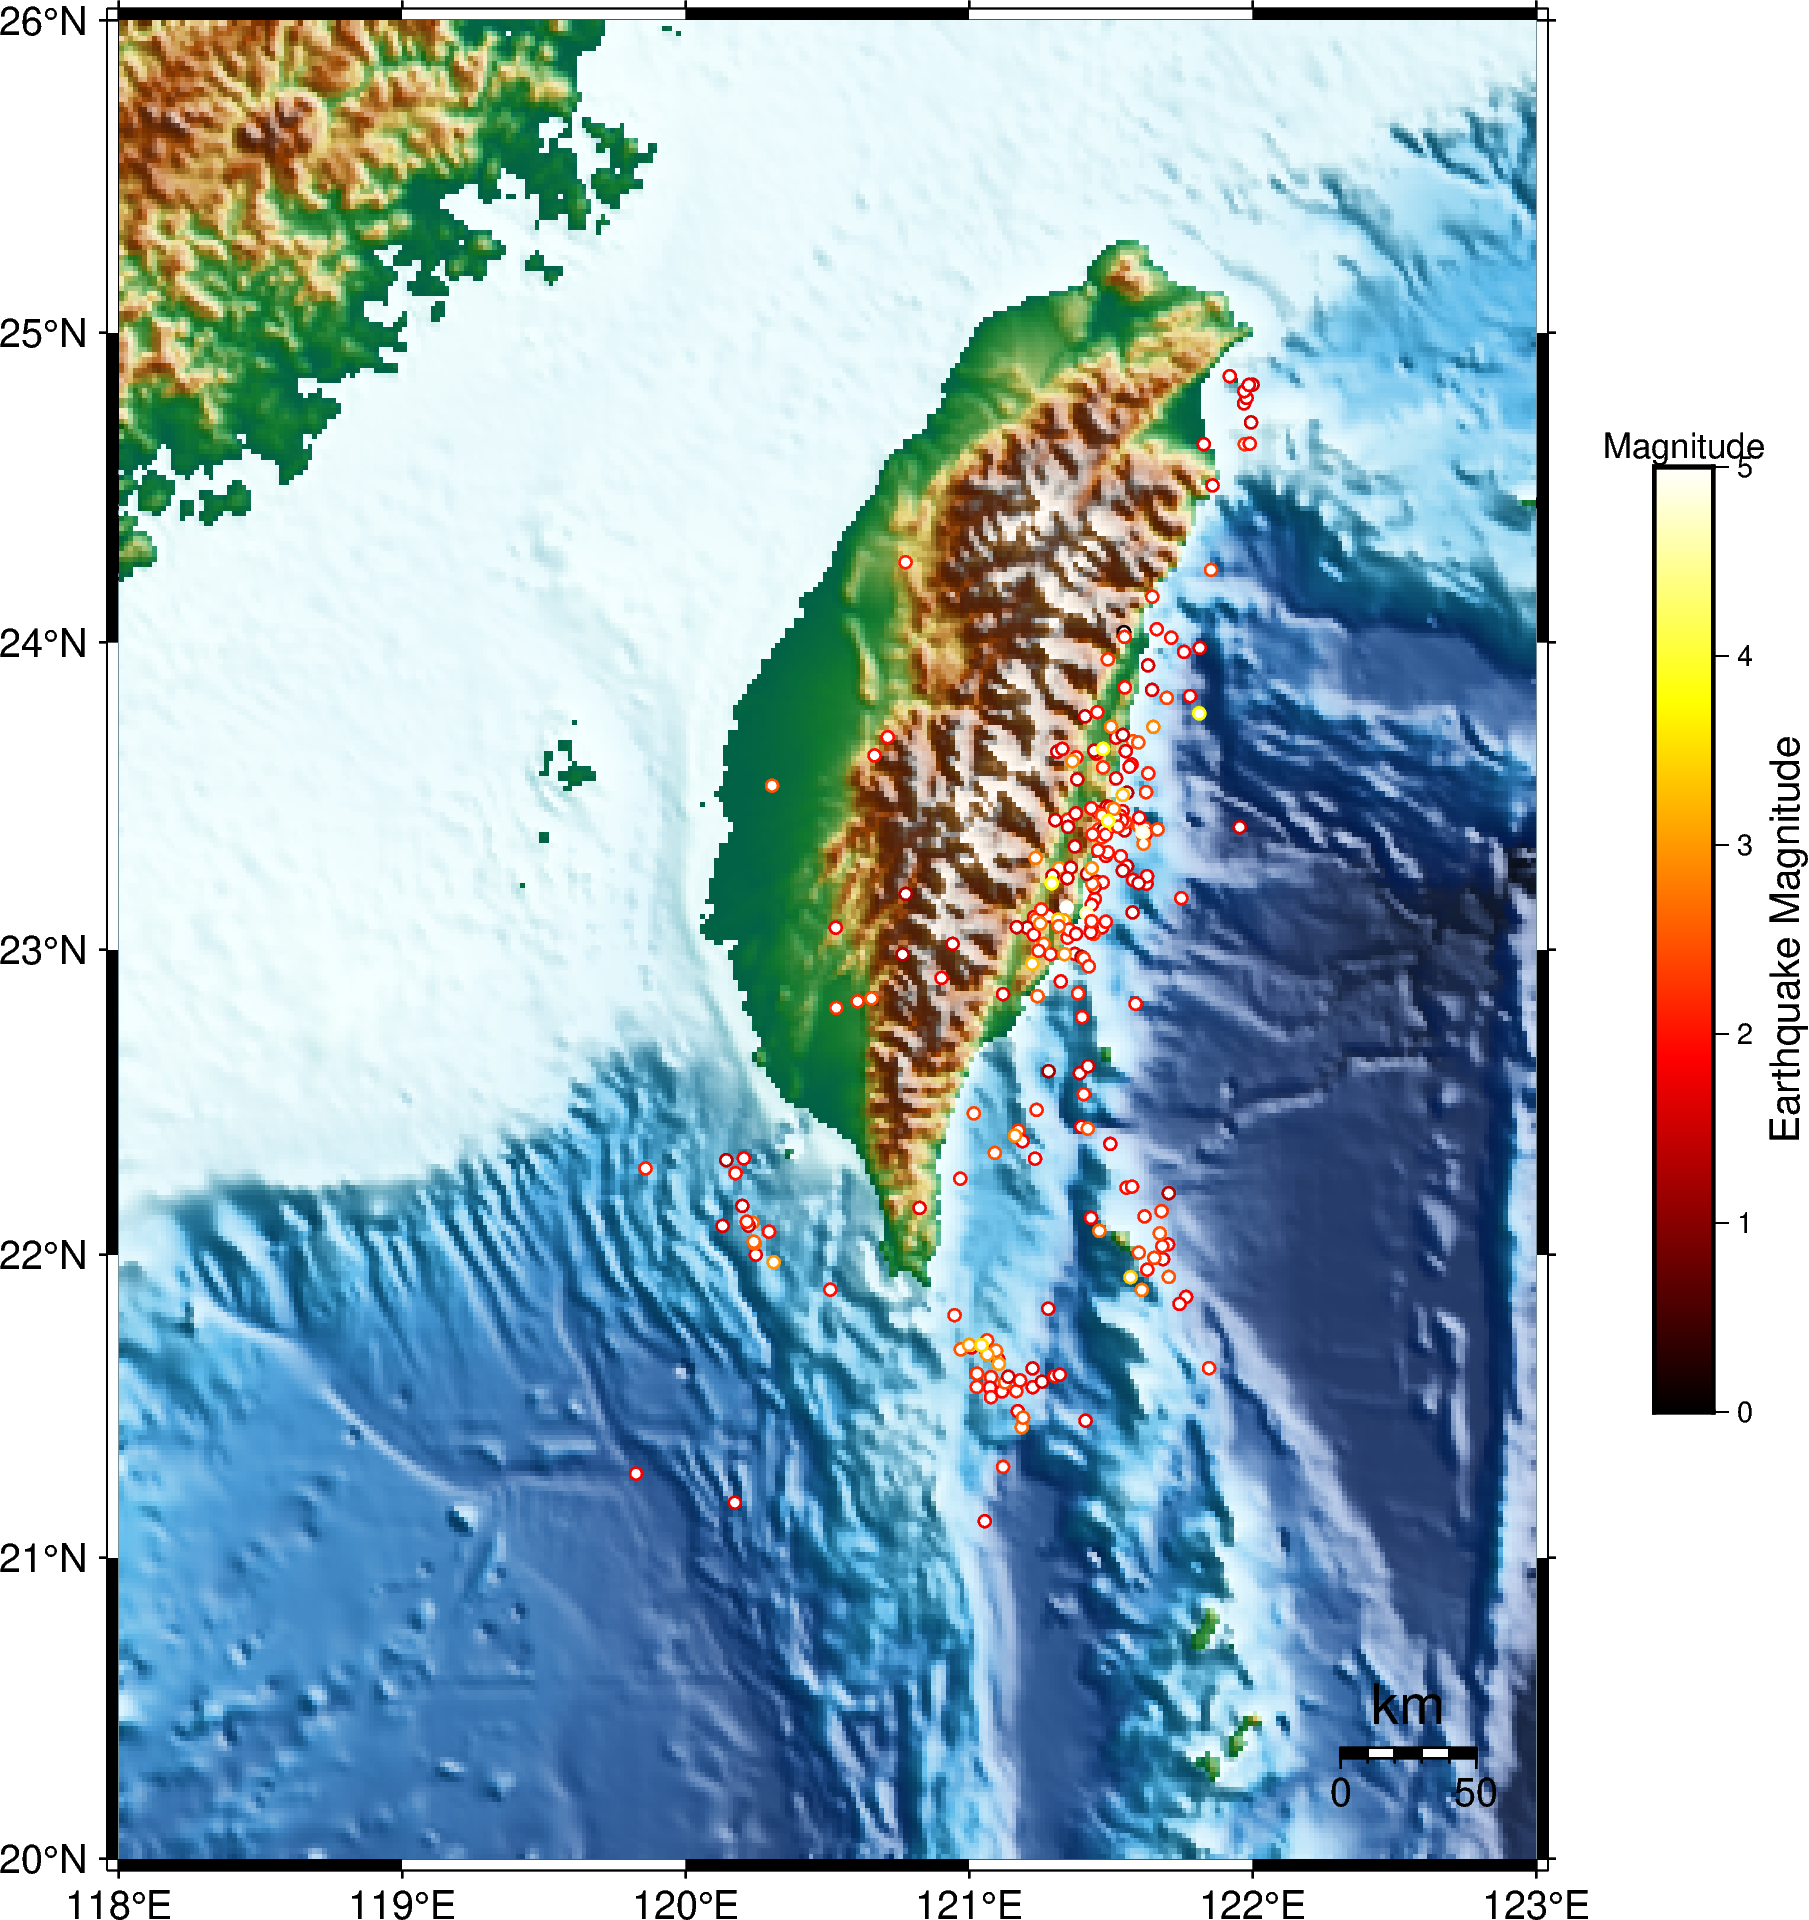

In [9]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pygmt
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

# Create FDSN client (using USGS)
client = Client("USGS")

# Define the query time range
starttime = UTCDateTime("2022-01-01")
endtime = UTCDateTime("2023-12-31")

# Define geographic region (Taiwan)
minlatitude = 21
maxlatitude = 26
minlongitude = 119
maxlongitude = 122

# Fetch earthquake catalog from USGS
try:
    cat = client.get_events(
        starttime=starttime, endtime=endtime,
        minlatitude=minlatitude, maxlatitude=maxlatitude,
        minlongitude=minlongitude, maxlongitude=maxlongitude,
        minmagnitude=1  # Set minimum magnitude to 1
    )
except Exception as e:
    print(f"Error fetching data from USGS: {e}")
    exit(1)

# Extract earthquake data
longitude = [event.origins[0].longitude for event in cat]
latitude = [event.origins[0].latitude for event in cat]
magnitude = [event.magnitudes[0].mag for event in cat]

# Use matplotlib colormap to map magnitude to color
cmap = plt.get_cmap("hot")  # Use heatmap color
min_mag = min(magnitude)
max_mag = max(magnitude)

# Normalize earthquake magnitudes between min and max
norm = matplotlib.colors.Normalize(vmin=min_mag, vmax=max_mag)  # Normalize magnitude range

# Initialize figure
fig = pygmt.Figure()

# Set map region and projection (Taiwan)
fig.basemap(region=[118, 123, 20, 26], projection="M12c", frame=["a1", "WSne"])

# Add land, water, and topography shading
fig.coast(shorelines="1/0.5p,black", borders="1/0.5p,black", water="lightblue")
fig.grdimage(grid="@earth_relief_01m", shading="+a45+nt1", cmap="geo")

# Plot earthquake points with color mapped to magnitude
for i in range(len(longitude)):
    color = cmap(norm(magnitude[i]))  # Map color based on magnitude
    color_hex = matplotlib.colors.rgb2hex(color[:3])  # Convert RGB color to hex
    
    fig.plot(
        x=[longitude[i]],
        y=[latitude[i]],
        style="c0.1c",  # Small circles
        color="white",  # Point color set to white
        pen=f"0.5p,{color_hex}"  # Border color changes based on magnitude
    )

# Add colorbar for magnitude range with fixed limits
fig.colorbar(
    cmap="hot",  # Use heatmap color
    frame=["a1+lMagnitude", "x+lEarthquake Magnitude"],
    position="JMR+w8c/0.5c+o1c/0c",
    scale="5"  # Adjust scale to make it clearer
)

# Add title and annotation in English
# Add title outside the map at the bottom
# fig.text(text="Earthquakes in Taiwan (2022-2023)", font="12p,Helvetica", justify="TC")


# Modify map scale for better visibility
fig.basemap(map_scale="jBR+w50k+l+f1km+o0.2i/0.3i")

# Display the map
fig.show()
